# Logistic Regression

is a classification problem

line to some curve type where val btw 0 and 1 = sigmoid function 
P = 1/(1 + e^ -z), 
cost function =  as non-linear function, so we use log loss formula.

## odds ratio in logistic reg

equaition of line  z = BX + b
                
   P = 1/(1 + e^ -z)
   
   (1 + e^ -z) = 1/p

   e^ -z = 1-p / p
   
   e^ z = p/1-p
   
   log(e^ z) = log (p/1-p)
   
   z = log(p/1-p)
   
   BX+b = log(p/1-p)
   
   instead of z , we use odds ratio = p/1-p
   
   by finding the value of z and equate it to odds ratio, and find the proab which lies btw 0 and 1
   
   

# Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data_knn_classification_cleaned_titanic.csv')
data.shape

(891, 25)

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### seperating independent and dependent varaiables

In [5]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### splitting the data

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, random_state = 56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

ValueError: Found input variables with inconsistent numbers of samples: [24, 891]

### normalisig (min_max_scaler)
    
  as the sklearn requires the values to be btw 0 and 1, so we normalise the data

In [7]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.448029,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.405018,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.415041,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.390681,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.419355,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## importing logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression as logReg
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import f1_score

In [12]:
# creating the instance of  logistic regression

logreg = logReg()

#fitting the model

logreg.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### making prediction using predict fun

In [21]:
#precictions using predict function over train set and test

train_predict = logreg.predict(x_train)
print(train_predict)
l = np.sqrt(msle(train_predict, y_train))
m = f1_score(train_predict, y_train)
l,m

[0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 

(0.2998418413930298, 0.7514910536779325)

In [22]:
test_predict = logreg.predict(x_test)
print(test_predict)
l =np.sqrt(msle(test_predict, y_test))
m = f1_score(test_predict, y_test)
l, m

[0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0
 0]


(0.2935641545053478, 0.736842105263158)

### making predictions using predict_proba fun

In [25]:
train_predict = logreg.predict_proba(x_train)
print(train_predict)
train_predict = train_predict[:,1]
train_predict

[[0.51807747 0.48192253]
 [0.90599654 0.09400346]
 [0.87200636 0.12799364]
 ...
 [0.22607554 0.77392446]
 [0.31667225 0.68332775]
 [0.04424771 0.95575229]]


array([0.48192253, 0.09400346, 0.12799364, 0.77517619, 0.63197608,
       0.11729717, 0.84515049, 0.77410272, 0.53660619, 0.08237219,
       0.10667104, 0.08593988, 0.12486521, 0.09689127, 0.60642202,
       0.08495395, 0.30782465, 0.12097921, 0.0720483 , 0.28556586,
       0.10320509, 0.21932357, 0.07151535, 0.59131405, 0.09082367,
       0.51428145, 0.08579228, 0.55572919, 0.60444429, 0.12910717,
       0.820319  , 0.08597516, 0.58752337, 0.13743317, 0.02228606,
       0.57359622, 0.2189523 , 0.1256813 , 0.05898146, 0.28598705,
       0.84201218, 0.39166574, 0.20305583, 0.70559965, 0.47667196,
       0.94282345, 0.37175431, 0.22126999, 0.16756689, 0.89330988,
       0.13335905, 0.63840275, 0.23936439, 0.61134557, 0.34083195,
       0.64669947, 0.77903087, 0.29332871, 0.10989962, 0.29912514,
       0.58471677, 0.29332871, 0.12450627, 0.45795764, 0.10317854,
       0.9760019 , 0.11771106, 0.08593988, 0.86256797, 0.66351388,
       0.93046624, 0.74886279, 0.89714864, 0.44936986, 0.84263

In [26]:
for i in range(0, len(train_predict)):
    if(train_predict[i] > 0.55):
        train_predict[i] = 1
    else:
        train_predict[i] = 0

In [27]:
l = np.sqrt(msle(train_predict, y_train))
m = f1_score(train_predict, y_train)
l, m

'''
here the error rate is slightly increased and f1_score value is slightly dec
'''

(0.30341861011869714, 0.7366255144032922)

 ### confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix as cf
cf = cf(y_test, test_predict)
cf

array([[127,  17],
       [ 23,  56]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report as cr
print(cr ( y_test, test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.77      0.71      0.74        79

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



### parameters of logistic reg

In [38]:
#printing coefficients

logreg.coef_

array([-0.03568278,  0.00291173,  1.01367642,  0.14953386, -1.08153753,
        1.18549131, -1.10381856,  0.86032941,  1.06209213,  0.35948456,
       -0.68458738, -0.79656641, -0.28878937, -0.43029018,  0.12406036,
        0.59592578, -0.18184802,  0.21505309, -0.35814802, -0.1431359 ,
       -0.17023453,  0.13556721,  0.23703207, -0.29092653])

Text(0.5, 1.0, 'Coefficient plot')

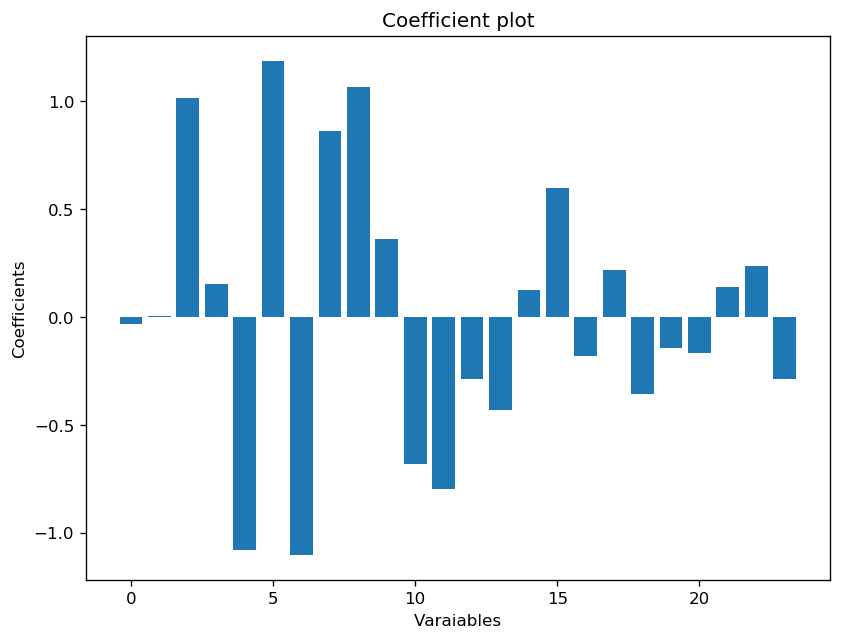

In [40]:
# plotting coeff

plt.figure( figsize = (8, 6), dpi =120, facecolor ='w', edgecolor ='b')
x = range(len(x_train.columns))
c = logreg.coef_.reshape(-1)
plt.bar(x, c)
plt.xlabel('Varaiables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

'''
if the bar is high, which mean those var are more significant
'''

In [50]:
#coeffs of respective var

Coeffs = pd.DataFrame({
    'Variable': x_train.columns,
    'Coefficients' :abs(c)
})
Coeffs.head(150)

,Variable,Coefficients
0,Age,0.035683
1,Fare,0.002912
2,Pclass_1,1.013676
3,Pclass_2,0.149534
4,Pclass_3,1.081538
5,Sex_female,1.185491
6,Sex_male,1.103819
7,SibSp_0,0.860329
8,SibSp_1,1.062092
9,SibSp_2,0.359485


In [51]:
# selecting var with high coeff

sig_var = Coeffs[Coeffs.Coefficients > 0.3 ] 
sig_var

,Variable,Coefficients
2,Pclass_1,1.013676
4,Pclass_3,1.081538
5,Sex_female,1.185491
6,Sex_male,1.103819
7,SibSp_0,0.860329
8,SibSp_1,1.062092
9,SibSp_2,0.359485
10,SibSp_3,0.684587
11,SibSp_4,0.796566
13,SibSp_8,0.430290


In [52]:
subset  = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [56]:
# splitting the data

x_train, x_test, y_train, y_test =train_test_split (subset, y, random_state = 56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((668, 12), (223, 12), (668,), (223,))

In [59]:
#creating an instance of logistic fun

logreg = logReg()

#fitting the model

logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#making predictions using predict fun

train_predict = logreg.predict(x_train)
l = np.sqrt(msle(train_predict, y_train))
m = f1_score(train_predict, y_train) 
l, m

(0.3284602804296973, 0.7011952191235059)

In [61]:
test_predict = logreg.predict(x_test)
l = np.sqrt(msle(test_predict, y_test))
m = f1_score(test_predict, y_test) 
l, m

'''
these prediction values are only based on significant data
'''

(0.2666428849015341, 0.7755102040816326)

In [68]:
#making predictions using predict_proba fun

train_predict = logreg.predict_proba(x_train)
train_predict

array([[0.45024456, 0.54975544],
       [0.89378293, 0.10621707],
       [0.89378293, 0.10621707],
       ...,
       [0.23612983, 0.76387017],
       [0.52159333, 0.47840667],
       [0.05964939, 0.94035061]])

In [69]:
test_predict = logreg.predict_proba(x_test)
test_predict

ValueError: y_true and y_pred have different number of output (2!=1)